## Importing the important libraries and the datasset

In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install opendatasets
import opendatasets as od
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [4]:
download_url= "https://www.kaggle.com/unsdsn/world-happiness"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashyk
Your Kaggle Key: ··········


100%|██████████| 36.8k/36.8k [00:00<00:00, 8.26MB/s]

In [5]:
train_2015 = pd.read_csv("./world-happiness/2015.csv")
train_2016 = pd.read_csv("./world-happiness/2016.csv")
train_2017 = pd.read_csv("./world-happiness/2017.csv")
train_2018 = pd.read_csv("./world-happiness/2018.csv")
train_2019 = pd.read_csv("./world-happiness/2019.csv")

## Analysis on dataset of year-2015

In [6]:
train_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
train_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
train_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
train_2015.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [10]:
#for histogram/bar graph
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

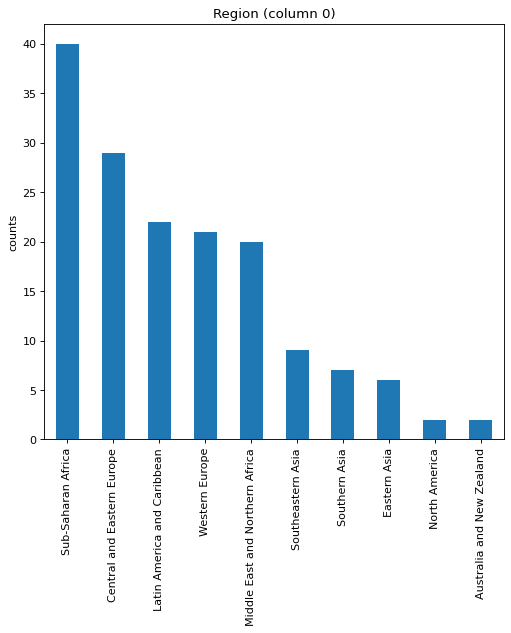

In [11]:
plotPerColumnDistribution(train_2015, 10, 5)

This shows that the region of Sub-Saharan Africa has the highest number of countries in the ranking based on the happiness index

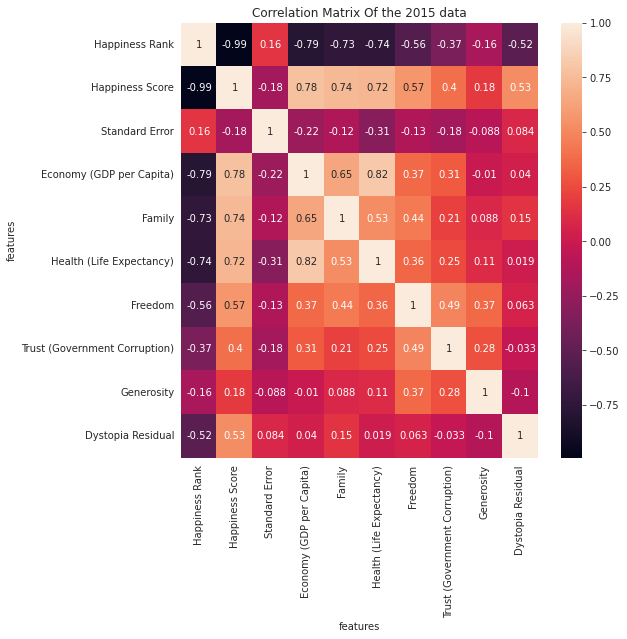

In [12]:
#Correlation Matrix
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))


hm = sns.heatmap(train_2015.corr(), annot= True)
hm.set(xlabel= "features", ylabel= "features", title = "Correlation Matrix Of the 2015 data")


plt.show()


In [13]:
#lets save the above heatmap
plt.savefig("Correlation_Matrix_Of_Year_2015.png")

<Figure size 432x288 with 0 Axes>

### Analysis based on the Correlation Matrix
By the Help of the correlation Matrix lets try to analyze the columns with respect to the other columns

From the above correlation matrix, we can have the following major Conclusion:
1. Happiness Rank has the negative correlation with the Happiness score.
2. Happiness Score has the highest correlation with Economy followed by family.
3. Economy has the highest Correlation with the Health Expectancy.

#### Economy vs Happiness Score

Text(0, 0.5, 'Happiness score')

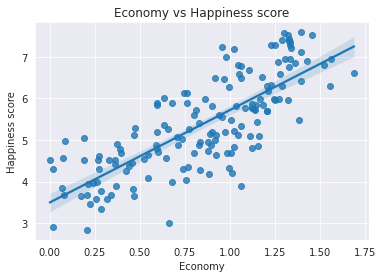

In [14]:
#lets plot the graphs tp explore the data
plt.title("Economy vs Happiness score")
sns.regplot(data= train_2015, x= "Economy (GDP per Capita)", y="Happiness Score")
plt.xlabel("Economy")
plt.ylabel("Happiness score")

The scatterplot shows that the Happiness score is linearly dependent in the Economy. Economy is playing an important factor. Country in which people are unable to afford  even their basic needs because of the decreasing economy cant be happy. On the other hand country having the good economy almost achieved a good happiness score.

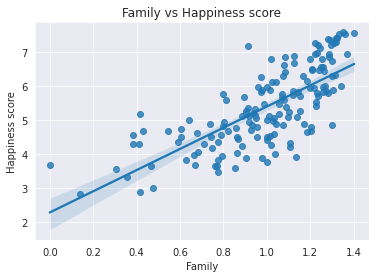

In [15]:
plt.title("Family vs Happiness score");
sns.regplot(data= train_2015, x= "Family", y="Happiness Score");
plt.xlabel("Family");
plt.ylabel("Happiness score");

A family always makes a good environment around them. An environment of joy is always there. This fact is also explained by the fact. having a family possess happiness. The Plot shows that the `Happiness score` is almost linearly dependent on the `Family` factor

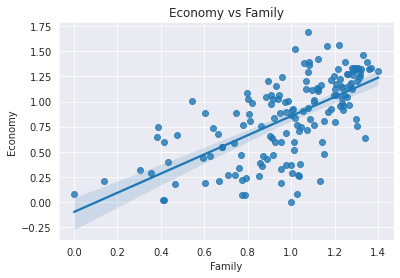

In [16]:
plt.title("Economy vs Family");
sns.regplot(data= train_2015, x= "Family", y="Economy (GDP per Capita)");
plt.xlabel("Family");
plt.ylabel("Economy");

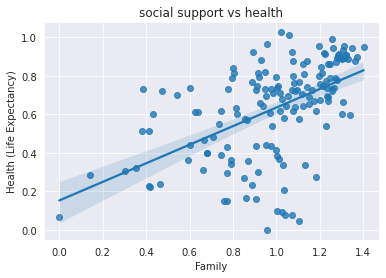

In [17]:
plt.title("social support vs health");
sns.regplot(data= train_2015, x= "Family", y="Health (Life Expectancy)");
plt.xlabel("Family");
plt.ylabel("Health (Life Expectancy)");

## Analysis on the dataset of year-2016

In [18]:
train_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [19]:
train_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

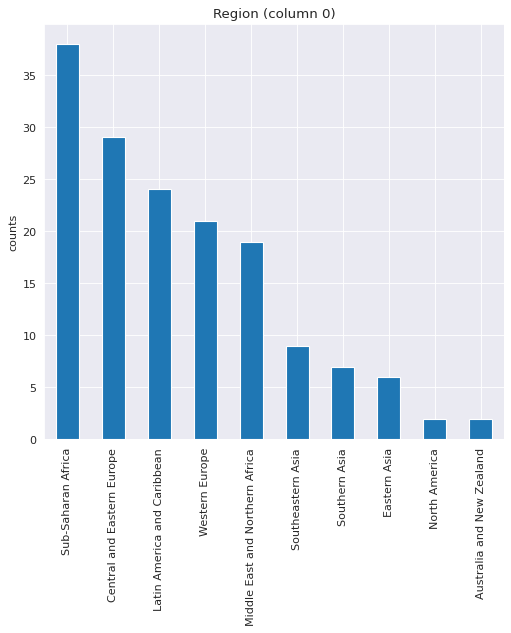

In [20]:
plotPerColumnDistribution(train_2016, 10, 5)

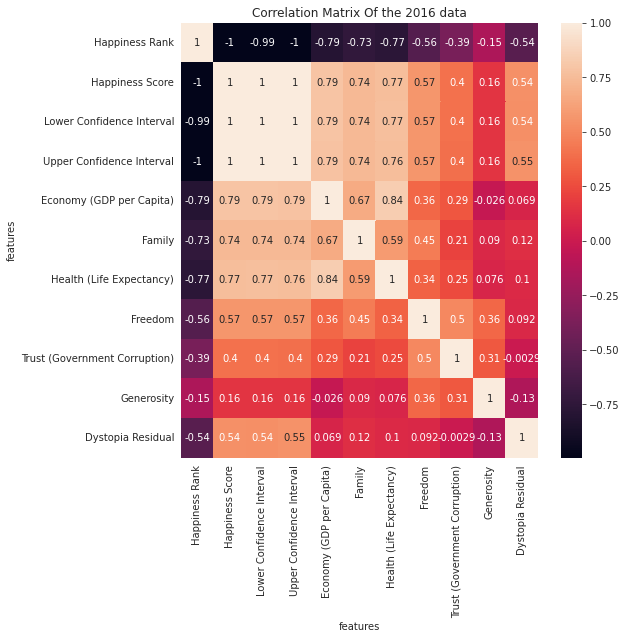

In [21]:
#Correlation Matrix
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))


hm = sns.heatmap(train_2016.corr(), annot= True)
hm.set(xlabel= "features", ylabel= "features", title = "Correlation Matrix Of the 2016 data")

plt.show()


Text(0, 0.5, 'Happiness score')

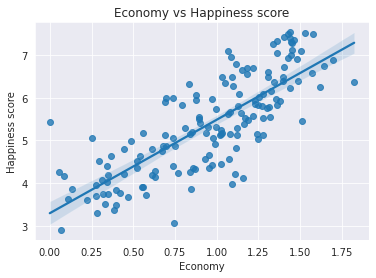

In [22]:
#lets plot the graphs tp explore the data
plt.title("Economy vs Happiness score")
sns.regplot(data= train_2016, x= "Economy (GDP per Capita)", y="Happiness Score")
plt.xlabel("Economy")
plt.ylabel("Happiness score")

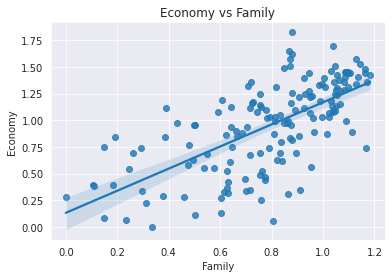

In [23]:
plt.title("Economy vs Family");
sns.regplot(data= train_2016, x= "Family", y="Economy (GDP per Capita)");
plt.xlabel("Family");
plt.ylabel("Economy");

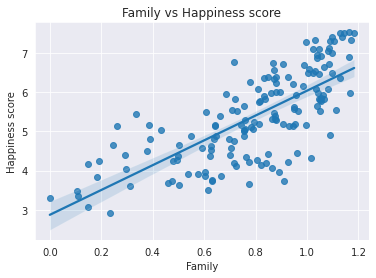

In [24]:
plt.title("Family vs Happiness score");
sns.regplot(data= train_2016, x= "Family", y="Happiness Score");
plt.xlabel("Family");
plt.ylabel("Happiness score");

## Analysis on the dataset of year-2017

In [25]:
train_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


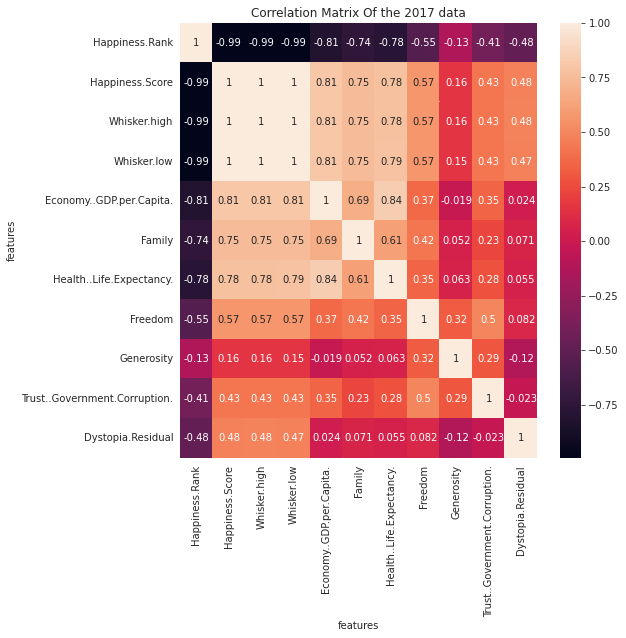

In [26]:
#Correlation Matrix
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))


hm = sns.heatmap(train_2017.corr(), annot= True)
hm.set(xlabel= "features", ylabel= "features", title = "Correlation Matrix Of the 2017 data")

plt.show()

## Analysis on the dataset of year-2018

In [27]:
train_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


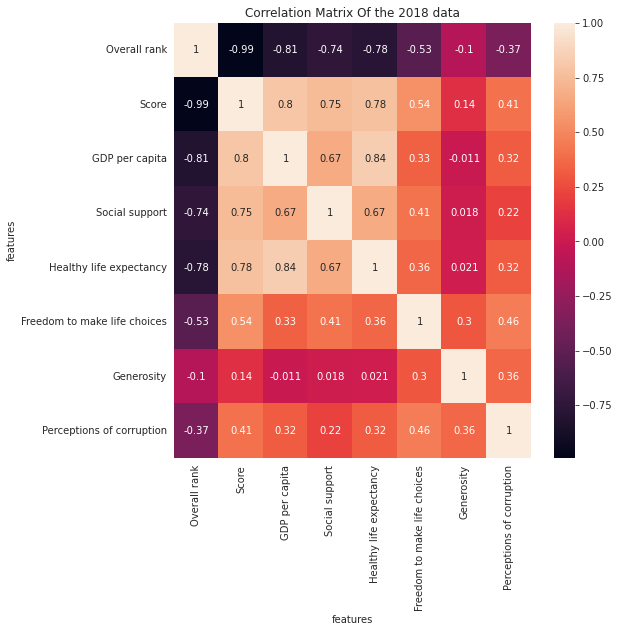

In [28]:
#Correlation Matrix
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))


hm = sns.heatmap(train_2018.corr(), annot= True)
hm.set(xlabel= "features", ylabel= "features", title = "Correlation Matrix Of the 2018 data")

plt.show()

## Analysis on the dataset of year-2019

In [31]:
train_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


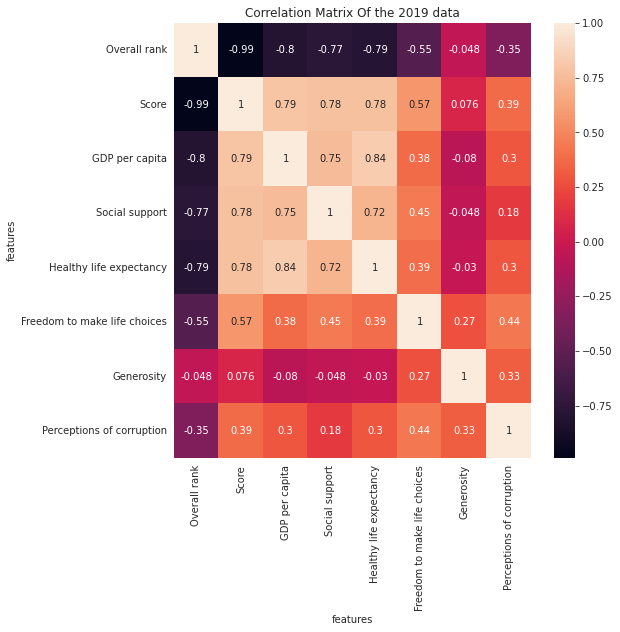

In [30]:
#Correlation Matrix
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))


hm = sns.heatmap(train_2019.corr(), annot= True)
hm.set(xlabel= "features", ylabel= "features", title = "Correlation Matrix Of the 2019 data")

plt.show()

## PREPROCESSING

In [25]:
#data cleaning for the year-2015
t2015_df=train_2015.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'], axis=1, inplace=False)
t2016_df=train_2016.drop(['Country','Region','Happiness Rank','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1, inplace=False)
t2017_df=train_2017.drop(['Country','Happiness.Rank','Whisker.high','Whisker.low','Dystopia.Residual'], axis=1, inplace=False)
t2018_df=train_2018.drop(['Country or region','Overall rank'], axis=1, inplace=False)
t2019_df=train_2019.drop(['Country or region','Overall rank'], axis=1, inplace=False)


## Rearranging the columns of each data so that they can be joined.

column= t2017_df.pop('Trust..Government.Corruption.')
t2017_df.insert(5, 'Trust..Government.Corruption.', column)

column= t2018_df.pop('Generosity')
t2018_df.insert(6, 'Generosity', column)

column= t2019_df.pop('Generosity')
t2019_df.insert(6, 'Generosity', column)

df=[t2015_df, t2016_df, t2017_df, t2018_df, t2019_df]

for data in df:
  data.columns = ['Happiness Score', 'Economy(GDP per capita)','Social Support','Health(Life Expentency)','Freedom','Perceptions of corruption','Generosity']

final_df= pd.concat([t2015_df, t2016_df, t2017_df, t2018_df, t2019_df], axis=0)
final_df.shape

(782, 7)

In [26]:
final_df.describe()

,Happiness Score,Economy(GDP per capita),Social Support,Health(Life Expentency),Freedom,Perceptions of corruption,Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


In [27]:
final_df

,Happiness Score,Economy(GDP per capita),Social Support,Health(Life Expentency),Freedom,Perceptions of corruption,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
151,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
152,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
153,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
154,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [28]:
input_cols = ['Economy(GDP per capita)',	'Social Support',	'Health(Life Expentency)',	'Freedom','Perceptions of corruption',	'Generosity']
target_cols= ['Happiness Score']
final_inputs= final_df[input_cols]
final_targets= final_df[target_cols]


In [29]:
final_df

,Happiness Score,Economy(GDP per capita),Social Support,Health(Life Expentency),Freedom,Perceptions of corruption,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
151,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
152,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
153,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
154,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [30]:
final_df.isnull().sum()

Happiness Score              0
Economy(GDP per capita)      0
Social Support               0
Health(Life Expentency)      0
Freedom                      0
Perceptions of corruption    1
Generosity                   0
dtype: int64

In [31]:
final_df.dropna(inplace=True)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df[input_cols], final_df[target_cols], test_size= 0.2, random_state=45)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(final_df[input_cols])
x_train[input_cols]=scaler.transform(x_train[input_cols])
x_test[input_cols]=scaler.transform(x_test[input_cols])

In [53]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor 
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [35]:
x_train.isnull().sum()

Economy(GDP per capita)      0
Social Support               0
Health(Life Expentency)      0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
dtype: int64

In [36]:
models =[LinearRegression(), 
          Lasso(), 
          Ridge(), 
          SGDRegressor(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          AdaBoostRegressor(), 
          GradientBoostingRegressor(),
          LGBMRegressor (),
          XGBRegressor()
]
for model in models:
  print(model)
  mod=model.fit(x_train,y_train)
  train_rmse=mean_squared_error(mod.predict(x_train),y_train)
  test_rmse=mean_squared_error(mod.predict(x_test),y_test)
  print("Training rmse:", train_rmse)
  print("Testing rmse:", test_rmse)
  print("\n")


LinearRegression()
Training rmse: 0.30724852084248866
Testing rmse: 0.2719075083312046


Lasso()
Training rmse: 1.2752210029789244
Testing rmse: 1.2589735498041037


Ridge()
Training rmse: 0.3075413617581381
Testing rmse: 0.27215386214238596


SGDRegressor()
Training rmse: 0.3241827259460628
Testing rmse: 0.28180603257789577


DecisionTreeRegressor()
Training rmse: 3.968837042872131e-18
Testing rmse: 0.5355922079651542


RandomForestRegressor()
Training rmse: 0.03255875360503288
Testing rmse: 0.23809274044579146


AdaBoostRegressor()
Training rmse: 0.24306266964405737
Testing rmse: 0.29453668552121687


GradientBoostingRegressor()
Training rmse: 0.11262082320694056
Testing rmse: 0.23671922806510437


LGBMRegressor()
Training rmse: 0.030566948191930787
Testing rmse: 0.23352654228593156


XGBRegressor()
[07:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training rmse: 0.12247241085813669
Testing rmse: 0.243194930